# Solving the n-Queens Problem using Local Search

## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file. 


## The n-Queens Problem

* __Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

* __State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector $\mathbf{q} = \{q_1, q_2, \dots, q_n\}$, each number representing the row positions of the queens from left to right. We will call a state a "board."

* __Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).
The optimization problem is to find the optimal arrangement $\mathbf{q}^*$ of $n$ queens on the board can be written as:

  > minimize: $\mathrm{conflicts}(\mathbf{q})$
  >
  > subject to: $\mathbf{q} \ \text{contains only one queen per column}$

  Note: the constraint (subject to) is enforced by the definition of the state space.

* __Local improvement move:__ Move one queen to a different row in its column.

* __Termination:__ For this problem there is always an arrangement $\mathbf{q}^*$ with $\mathrm{conflicts}(\mathbf{q}^*) = 0$, however, the local improvement moves might end up in a local minimum. 

## Helper functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

np.random.seed(1234)


def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""
    
    return(np.random.randint(0,n, size = n))

def comb2(n): return n*(n-1)//2 # this is n choose 2 equivalent to math.comb(n, 2); // is int division

def conflicts(board):
    """Caclulate the number of conflicts, i.e., the objective function."""

    n = len(board)
    
    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * 2 * n
    diagonal2_cnt = [0] * 2 * n
    
    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n] += 1
    
    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))


def show_board(board, cols = ['white', 'gray'], fontsize = 48):  
    """display the board"""
    
    n = len(board)
    
    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0): 
                display[i,j] = 1
    
    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap, 
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])
    
    # place queens. Note: Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize, 
                 horizontalalignment = 'center',
                 verticalalignment = 'center')
    
    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

## Create a board

Board with 4 conflicts.


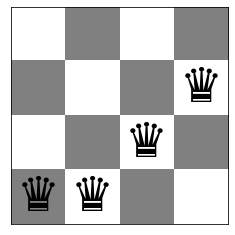

Queens (left to right) are at rows: [3 3 2 1]
Number of conflicts: 4


In [2]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

A board $4 \times 4$ with no conflicts:

Board with 0 conflicts.


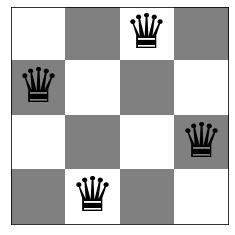

In [3]:
board = [1,3,0,2]
show_board(board)

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Steepest-ascend Hill Climbing Search [30 Points]

Calculate the objective function for all local moves (see definition of local moves above) and always choose the best among all local moves. If there are no local moves that improve the objective, then you have reached a local optimum. 

## Implementation Description

I did quite a bit of research on how to solve the n-queen problem using hill climbing search, and I found the following that guided my implementation: https://letstalkdata.com/2013/12/n-queens-part-1-steepest-hill-climbing/. I also used the class slides to help me with this assignment.

**In terms of how my implementation of steepest-ascend works:**
* I iterate through the rows and columns of the board and I find all of the possible moves and their associated number of conflicts.
* From there, I iterate through the possible moves and check to see if the number of conflicts--which would be h in this case--is less than that of the "best_h" which is just the current state of the board.
* I then find the "best" move from all of the best moves, which would just be the minimum number of conflicts/the highest-valued successor.
* Throughout all of this, I am tracking the number of moves. If I happen to get stuck at a local optimum, I will continue finding neighbors until the number of moves reaches the size of the board squared (n^2).

In [4]:
# Code and description go here
def find_neighbor_steepest(board):
    possible_moves = {} #Initialize possible_moves dictionary
    
    # Iterate through all of the possible moves
    for col in range(len(board)):
        curr_move = board[col]
        
        for row in range(len(board)):
            if(board[col] == row): 
                continue
            temp = list(board) # Create a temp board by converting board to a list
            temp[col] = row
            possible_moves[(col, row)] = conflicts(temp) # Store number of conflicts as value of possible moves
    best_moves = {}
    best_h = conflicts(board)
    
    # Iterate through possible moves and check to see which value has the best h
    for key, value in possible_moves.items():
        if value < best_h:
            best_h = value
            
    for key, value in possible_moves.items():
        if value == best_h:
            best_moves[key] = value
    # For steepest-ascend you have to choose the highest-valued successors, so get min of the best moves 
    if best_moves:
        best_move = min(best_moves.items(), key=lambda x: x[1]) 
        col = best_move[0][0]
        row = best_move[0][1]
        board[col] = row
    else: 
        return board
    
    return board
            


In [5]:
def steepest_hill_climbing(board, verbose = True):
    current = board
    moves = 0
    while conflicts(current) > 0 and moves < len(board)*len(board): # Run until 0 conflicts or until moves > n*n
        neighbor = find_neighbor_steepest(board)
        if verbose: show_board(neighbor)
        if(conflicts(neighbor) <= conflicts(current)):
            current = neighbor
        moves += 1    
    return moves

In [6]:
board= random_board(8)

steepest_hill_climbing(board, False)

5

## Task 2: Stochastic Hill Climbing 1 [10 Points]

Chooses randomly from among all uphill moves till you have reached a local optimum.

## Implementation Description

Similar to my steepest hill implementation, I followed the same general implementation for stochastic hill climbing. However, the one major change is that rather than finding the highest value successor from all of the "best" moves (which would all just be the uphill moves since you can only move uphill if the number of conflicts is less than the current state) I just choose randomly.

If I get stuck in a local optimum, I follow the same logic, again, of running until n*n moves are made.

In [7]:
import random

In [8]:
# Same implementatin as steepest hill
def find_neighbor_stochastic(board):
    possible_moves = {}
    
    for col in range(len(board)):
        curr_move = board[col]
        
        for row in range(len(board)):
            if(board[col] == row):
                continue
            temp = list(board)
            temp[col] = row
            possible_moves[(col, row)] = conflicts(temp)
    uphill_moves = {}
    best_h = conflicts(board)
    for key, value in possible_moves.items():
        if value < best_h:
            best_h = value
            
    for key, value in possible_moves.items():
        if value == best_h:
            uphill_moves[key] = value

    if uphill_moves:
        next_move = random.choice(list(uphill_moves.items())) # Choose random move from all uphill moves
        col = next_move[0][0]
        row = next_move[0][1]
        board[col] = row
    
    return board
            


In [9]:
# No change to these definitions since it's just finding the neighbors

def stochastic_hill_climbing(board, verbose = True):
    current = board
    moves = 0
    while conflicts(current) > 0 and moves < len(board)*len(board):
        neighbor = find_neighbor_stochastic(board)
        if verbose: show_board(neighbor)
        if(conflicts(neighbor) <= conflicts(current)):
            current = neighbor
        moves += 1    
    return moves

In [10]:
board= random_board(8)

stochastic_hill_climbing(board, False)

32

## Task 3: Stochastic Hill Climbing 2 [20 Points]

A popular version of stochastic hill climbing generates only a single random local neighbor at a time and accept it if it has a better objective function value than the current state. This is very efficient if each state has many possible successor states. This method is called "First-choice hill climbing" in the textbook.

__Notes:__ 

* Detecting local optima is tricky! You can, for example, stop if you were not able to improve the objective function during the last $x$ tries.

## Implementation Description

For stochastic hill climbing 2, I followed basically the exact same implementation as stochastic hill climbing 1. **However,** the one main difference is that I avoid running into local optima by only checking random values n/2 times. This way, I limit the program from continuing in endless cycles but still maintains the randomness of it.

In [11]:
# Same implementation as stochastic except ideal random choice is made.
def find_neighbor_stochastic2(board):
    possible_moves = {}
    
    for col in range(len(board)):
        curr_move = board[col]
        
        for row in range(len(board)):
            if(board[col] == row):
                continue
            temp = list(board)
            temp[col] = row
            possible_moves[(col, row)] = conflicts(temp)
    best_moves = {}
    best_h = conflicts(board)
    for key, value in possible_moves.items():
        if value < best_h:
            best_h = value
            
    for key, value in possible_moves.items():
        if value == best_h:
            best_moves[key] = value
            
    if best_moves:
        best_move = random.choice(list(best_moves.items())) # Set best choice as the first random move
        for x in range(int(len(board)/2)):
            curr_move = random.choice(list(best_moves.items()))
            if curr_move[1] < best_move[1]: # check values of next valued choice. If less conflicts then best = curr
                best_move = curr_move
        col = best_move[0][0]
        row = best_move[0][1]
        board[col] = row
    
    return board

In [12]:
# Same as before. No changes to this specific definition.

def stochastic_hill_climbing2(board, verbose = True):
    current = board
    moves = 0
    while conflicts(current) > 0 and moves < len(board)*len(board):
        neighbor = find_neighbor_stochastic2(board)
        if verbose: show_board(neighbor)
        if(conflicts(neighbor) <= conflicts(current)):
            current = neighbor
        moves += 1
    return moves

In [13]:
board= random_board(8)
stochastic_hill_climbing2(board, False)

64

## Task 4: Hill Climbing Search with Random Restarts [10 Points]

Hill climbing will often end up in local optima. Restart the each of the three hill climbing algorithm up to 100 times with a random board to find a better (hopefully optimal) solution. Note that restart just means to run the algoithm several times starting with a new random board.

## Implementation Description

For the hill climbing search with random restarts, I essentially created a function that tracks:
* Best Run (Least number of moves)
* Worst Run (Most number of moves)
* Average Run (Average number of moves)
* Best Time (Least amount of time)
* Worst Time (Most amount of time)
* Average Time (Average amount of time)

For each of the algorithms. This function accepts the board, board size, algorithm to run, and the number of runs.

In [14]:
import numpy as np
import time

In [15]:
# Random Restarts Implementation
def random_restarts(board, n, algorithm, num_runs, verbose = True):
    # Best run, worst run, average run same for time
    best_run = np.inf
    worst_run = 0
    sum_runs = 0
    best_time = 0
    worst_time = 0
    sum_time = 0
    
    values = []
    
    # Run the algorithms exclusively for those passed in.
    if algorithm == "steepest":
        for runs in range(num_runs):
            st = time.time() # Start time
            curr_run = steepest_hill_climbing(board, False)
            end = time.time() # End time
            sum_runs += curr_run
            sum_time += (end-st)
            if curr_run < best_run: # best run
                best_run = curr_run
                best_time = end-st
            if curr_run > worst_run: # worst run
                worst_run = curr_run
                worst_time = end-st
            board = random_board(n) # Reset the board
        if verbose: print("Optimal # of moves for an ", n, "x", n, " board for Steepest Hill: ", best_run)
    elif algorithm == "stochastic":
        for runs in range(num_runs):
            st = time.time()
            curr_run = stochastic_hill_climbing2(board, False)
            end = time.time()
            sum_runs += curr_run
            sum_time += (end-st)
            if curr_run < best_run:
                best_run = curr_run
                best_time = end-st
            if curr_run > worst_run:
                worst_run = curr_run
                worst_time = end-st
            board = random_board(n)
        if verbose: print("Optimal # of moves for an ", n, "x", n, " board for Stochastic Hill: ", best_run)
    elif algorithm == "stochastic2":
        for runs in range(num_runs):
            st = time.time()
            curr_run = stochastic_hill_climbing(board, False)
            end = time.time()
            sum_runs += curr_run
            sum_time += (end-st)
            if curr_run < best_run:
                best_run = curr_run
                best_time = end-st
            if curr_run > worst_run:
                worst_run = curr_run
                worst_time = end-st
            board = random_board(n)
        if verbose: print("Optimal # of moves for an ", n, "x", n, " board for Stochastic Hill 2: ", best_run)
    # Calculate averages and append all values to the values list
    average_run = sum_runs/num_runs
    avg_time = sum_time/num_runs
    values.append(n)
    values.append(best_run)
    values.append(worst_run)
    values.append(average_run)
    values.append(best_time)
    values.append(worst_time)
    values.append(avg_time)
    
    return values
    
    

In [16]:
board = random_board(8)
random_restarts(board, 8, "steepest", 100)

Optimal # of moves for an  8 x 8  board for Steepest Hill:  2


[8,
 2,
 64,
 45.78,
 0.0011849403381347656,
 0.03803706169128418,
 0.026772890090942383]

In [17]:
board = random_board(8)
random_restarts(board, 8, "stochastic", 100)

Optimal # of moves for an  8 x 8  board for Stochastic Hill:  3


[8,
 3,
 64,
 21.62,
 0.0018429756164550781,
 0.037711143493652344,
 0.012920143604278565]

In [18]:
board = random_board(8)
random_restarts(board, 8, "stochastic2", 100)

Optimal # of moves for an  8 x 8  board for Stochastic Hill 2:  3


[8,
 3,
 64,
 20.05,
 0.0017800331115722656,
 0.03828930854797363,
 0.011861884593963623]

## Task 5: Compare Performance [20 Points]

Use runtime and objective function value to compare the algorithms. 

* Use boards of different sizes to explore how the different algorithms perform. Make sure that you run the algorithms for each board size several times (at least 10 times) with different starting boards and report averages.

* How do the algorithms scale with problem size? Use tables and charts.

* What is the largest board each algorithm can solve in a reasonable amount time?

See [Profiling Python Code](../Python_Code_Examples/profiling_code.ipynb) for help about how to measure runtime in Python.

## How I measured performance

To measure the performance, I essentially call the random restarts function and create boards of sizes:
* 4
* 8
* 20
* 30
* 50

with only 10 runs per function call. From there, I store the values mentioned in the previous section and store them in a Pretty Table. I then put those values into a datafram to plot using seaborn.

In [19]:
from prettytable import PrettyTable

In [20]:
t = PrettyTable(['Algorithm', 'Board Size' ,'Best Run (# Moves)', 'Worst Run (# Moves)', 'Average Run (# Moves)', 'Best Time (s)', 'Worst Time (s)', 'Average Time (s)'])

In [21]:
# Run algorithms and store each run into the table
board = random_board(4)
values = random_restarts(board, 4, "steepest", 10)
t.add_row(['Steepest Hill', values[0], values[1], values[2], values[3], values[4], values[5], values[6]])

board = random_board(8)
values = random_restarts(board, 8, "steepest", 10)
t.add_row(['Steepest Hill',values[0], values[1], values[2], values[3], values[4], values[5], values[6]])

board = random_board(20)
values = random_restarts(board, 20, "steepest", 10)
t.add_row(['Steepest Hill', values[0], values[1], values[2], values[3], values[4], values[5], values[6]])

board = random_board(30)
values = random_restarts(board, 30, "steepest", 10)
t.add_row(['Steepest Hill', values[0], values[1], values[2], values[3], values[4], values[5], values[6]])

board = random_board(50)
values = random_restarts(board, 50, "steepest", 10)
t.add_row(['Steepest Hill', values[0], values[1], values[2], values[3], values[4], values[5], values[6]])

Optimal # of moves for an  4 x 4  board for Steepest Hill:  2
Optimal # of moves for an  8 x 8  board for Steepest Hill:  3
Optimal # of moves for an  20 x 20  board for Steepest Hill:  9
Optimal # of moves for an  30 x 30  board for Steepest Hill:  14
Optimal # of moves for an  50 x 50  board for Steepest Hill:  31


In [22]:
board = random_board(4)
values = random_restarts(board, 4, "stochastic", 10)
t.add_row(['Stochastic Hill', values[0], values[1], values[2], values[3], values[4], values[5], values[6]])

board = random_board(8)
values = random_restarts(board, 8, "stochastic", 10)
t.add_row(['Stochastic Hill',values[0], values[1], values[2], values[3], values[4], values[5], values[6]])

board = random_board(20)
values = random_restarts(board, 20, "stochastic", 10)
t.add_row(['Stochastic Hill', values[0], values[1], values[2], values[3], values[4], values[5], values[6]])

board = random_board(30)
values = random_restarts(board, 30, "stochastic", 10)
t.add_row(['Stochastic Hill', values[0], values[1], values[2], values[3], values[4], values[5], values[6]])

board = random_board(50)
values = random_restarts(board, 50, "stochastic", 10)
t.add_row(['Stochastic Hill', values[0], values[1], values[2], values[3], values[4], values[5], values[6]])

Optimal # of moves for an  4 x 4  board for Stochastic Hill:  2
Optimal # of moves for an  8 x 8  board for Stochastic Hill:  6
Optimal # of moves for an  20 x 20  board for Stochastic Hill:  12
Optimal # of moves for an  30 x 30  board for Stochastic Hill:  17
Optimal # of moves for an  50 x 50  board for Stochastic Hill:  28


In [23]:
board = random_board(4)
values = random_restarts(board, 4, "stochastic2", 10)
t.add_row(['Stochastic Hill 2', values[0], values[1], values[2], values[3], values[4], values[5], values[6]])

board = random_board(8)
values = random_restarts(board, 8, "stochastic2", 10)
t.add_row(['Stochastic Hill 2',values[0], values[1], values[2], values[3], values[4], values[5], values[6]])

board = random_board(20)
values = random_restarts(board, 20, "stochastic2", 10)
t.add_row(['Stochastic Hill 2', values[0], values[1], values[2], values[3], values[4], values[5], values[6]])

board = random_board(30)
values = random_restarts(board, 30, "stochastic2", 10)
t.add_row(['Stochastic Hill 2', values[0], values[1], values[2], values[3], values[4], values[5], values[6]])

board = random_board(50)
values = random_restarts(board, 50, "stochastic2", 10)
t.add_row(['Stochastic Hill 2', values[0], values[1], values[2], values[3], values[4], values[5], values[6]])

Optimal # of moves for an  4 x 4  board for Stochastic Hill 2:  2
Optimal # of moves for an  8 x 8  board for Stochastic Hill 2:  3
Optimal # of moves for an  20 x 20  board for Stochastic Hill 2:  15
Optimal # of moves for an  30 x 30  board for Stochastic Hill 2:  16
Optimal # of moves for an  50 x 50  board for Stochastic Hill 2:  30


## Local Search Algorithms Output Table

In [24]:
from prettytable import MARKDOWN
from IPython.display import display, Markdown, Latex
t.align = "c"
t.set_style(MARKDOWN) # Display pretty table as Markdown
display(t)

Algorithm,Board Size,Best Run (# Moves),Worst Run (# Moves),Average Run (# Moves),Best Time (s),Worst Time (s),Average Time (s)
Steepest Hill,4,2,5,3.0,0.0002219676971435547,0.0004942417144775391,0.00030112266540527344
Steepest Hill,8,3,64,57.9,0.0017580986022949219,0.03803682327270508,0.03405404090881348
Steepest Hill,20,9,400,360.9,0.0769658088684082,3.4968271255493164,3.098693060874939
Steepest Hill,30,14,900,635.1,0.39922475814819336,25.829905033111572,18.09726712703705
Steepest Hill,50,31,2500,2253.1,4.075005054473877,327.6363730430603,295.42992243766787
Stochastic Hill,4,2,5,2.6,0.0005080699920654297,0.0005240440368652344,0.00029585361480712893
Stochastic Hill,8,6,43,16.8,0.0038330554962158203,0.027196884155273438,0.010643410682678222
Stochastic Hill,20,12,113,35.9,0.10245203971862793,0.9646339416503906,0.30710749626159667
Stochastic Hill,30,17,104,35.7,0.48855090141296387,2.9610869884490967,1.0182075262069703
Stochastic Hill,50,28,64,43.1,3.7119550704956055,8.414623975753784,5.689429759979248


In [25]:
import pandas as pd 

In [26]:
# Convert Table to Pandas Dataframe for Graph Purposes
with open('output.csv', 'w', newline='') as f_output:
    f_output.write(t.get_csv_string())
f_output.close()
    
df = pd.read_csv('output.csv')

## Final Analysis

From the final analysis, I found that steepest hill is the **least efficient** algorithm of the three I implemented.
From there, it appears that stochastic hill 1 and 2 have similar performances. Since they overlap each other, you would have to reference the output table to actually compare their overall performance. Judging from the table, however, I can see that the performances are similar for stochastic 1 and 2.

In [27]:
import seaborn as sns

<AxesSubplot:xlabel='Board Size', ylabel='Average Run (# Moves)'>

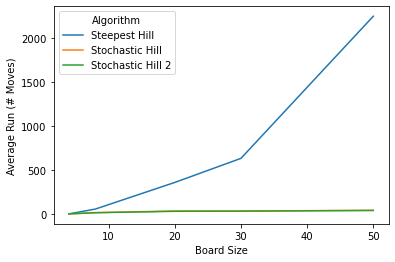

In [28]:
# Graph the data as a lineplot for visualization purposes
sns.lineplot(data=df, x="Board Size", y="Average Run (# Moves)", hue="Algorithm")

<AxesSubplot:xlabel='Board Size', ylabel='Average Time (s)'>

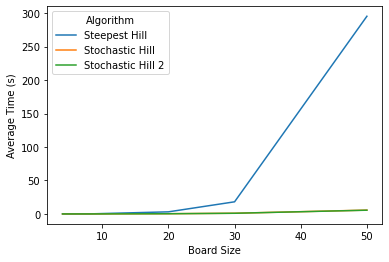

In [29]:
sns.lineplot(data=df, x="Board Size", y="Average Time (s)", hue="Algorithm")